In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data/train.csv')
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# PRE-PROCESSING

In [4]:
df=data.copy()

In [5]:
# featur ingenering 

# Extraire le groupe à partir de PassengerId
df['Group'] = df['PassengerId'].apply(lambda x: x.split('_')[0])

# Calculer la taille du groupe pour chaque passager
df['GroupSize'] = df.groupby('Group')['PassengerId'].transform('count')

# Créer une colonne indiquant si le passager est seul ou non
df['IsAlone'] = (df['GroupSize'] == 1).astype(int)


In [6]:
df=df.drop(['PassengerId','Name','Group','GroupSize'],axis=1)

In [7]:
df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,IsAlone
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1


In [8]:
list_col=list(df.columns)
list_col.remove('IsAlone')
list_col.insert(0,'IsAlone')

In [9]:
df=df[list_col]
df.head()

,IsAlone,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,0,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,0,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,1,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [10]:
df.shape

(8693, 13)

In [11]:
nan_count = df.isnull().sum()
nan_count

IsAlone           0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

## Encodage

In [15]:
import numpy as np

def clean_dataframe(df):
    # Remplacer les valeurs infinies par NaN
    df.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Remplacer les NaN par la moyenne de la colonne
#     df.fillna(df.mean(), inplace=True)
    df = df.dropna(axis=0)

    return df


In [16]:
import pandas as pd

def apply_one_hot_encoding(df):
    # Appliquer l'encodage one-hot pour les colonnes de type 'object' (catégoriques)
    df_encoded = pd.get_dummies(df, drop_first=True)
    return df_encoded


In [17]:
def convert_booleans_to_integers(df):
    # Rechercher les colonnes de type booléen et les convertir en 1/0
    bool_columns = df.select_dtypes(include=['bool']).columns
    df[bool_columns] = df[bool_columns].astype(int)
    return df


In [18]:
from sklearn.preprocessing import MinMaxScaler

def apply_normalization(df):
    # Identifier les colonnes numériques (int et float)
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

    # Appliquer la normalisation MinMaxScaler
    scaler = MinMaxScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    
    return df


In [19]:
# Étape 1 : Nettoyer les NaN et valeurs infinies
df_cleaned = clean_dataframe(df)

# Étape 2 : Appliquer l'encodage one-hot
df_encoded = apply_one_hot_encoding(df_cleaned)

# Étape 3 : Convertir les booléens en 1/0
df_converted = convert_booleans_to_integers(df_encoded)

# Étape 4 : Appliquer la normalisation
df_normalized = apply_normalization(df_converted)

# df_normalized est maintenant le dataframe final traité
df_normalized.head()


,IsAlone,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_G/996/S,Cabin_G/998/S,Cabin_G/999/P,Cabin_G/999/S,Cabin_T/1/P,Cabin_T/2/P,Cabin_T/3/P,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,1.0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1.0,0.303797,0.010988,0.000302,0.001064,0.024500,0.002164,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,0.734177,0.004335,0.119948,0.000000,0.299670,0.002410,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3,0.0,0.417722,0.000000,0.043035,0.015793,0.148563,0.009491,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1.0,0.202532,0.030544,0.002348,0.006428,0.025214,0.000098,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5,1.0,0.556962,0.000000,0.016201,0.000000,0.012986,0.000000,1,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.0,0.329114,0.004234,0.051622,0.000128,0.000000,0.000000,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8,1.0,0.443038,0.000000,0.026331,0.000724,0.009639,0.000000,1,0,0,...,0,0,0,0,0,0,0,0,1,0
9,0.0,0.177215,0.000000,0.000000,0.000000,0.000000,0.000000,1,1,0,...,0,0,0,0,0,0,0,0,0,0
11,0.0,0.569620,0.003931,0.244692,0.025072,0.004909,0.006098,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
df=df_normalized
df.head()

,IsAlone,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_G/996/S,Cabin_G/998/S,Cabin_G/999/P,Cabin_G/999/S,Cabin_T/1/P,Cabin_T/2/P,Cabin_T/3/P,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,1.0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1.0,0.303797,0.010988,0.000302,0.001064,0.024500,0.002164,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.0,0.734177,0.004335,0.119948,0.000000,0.299670,0.002410,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3,0.0,0.417722,0.000000,0.043035,0.015793,0.148563,0.009491,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1.0,0.202532,0.030544,0.002348,0.006428,0.025214,0.000098,1,0,0,...,0,0,0,0,0,0,0,0,1,0


## TrainTest - Nettoyage - Encodage

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
trainset, testset = train_test_split(df,test_size=0.2,random_state=0)

In [23]:
trainset['Transported'].value_counts()

1    2718
0    2693
Name: Transported, dtype: int64

In [24]:
testset['Transported'].value_counts()

1    683
0    670
Name: Transported, dtype: int64

In [25]:
def x_y(df):
    x=df.drop(['Transported'],axis=1)
    y=df['Transported']
    return x,y


In [26]:
X_train,Y_train=x_y(trainset)
X_test,Y_test=x_y(testset)

In [27]:
X_train.shape

(5411, 5425)

In [28]:
trainset.shape

(5411, 5426)

# Modellisation

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA


In [30]:
model_1 = RandomForestClassifier(random_state=0)

In [31]:
model_2 = make_pipeline(PolynomialFeatures(2), SelectKBest(f_classif, k=10),
                      RandomForestClassifier(random_state=0))

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

model_3 = make_pipeline(PolynomialFeatures(),StandardScaler(),SGDClassifier(random_state=0))

param ={'polynomialfeatures__degree':[2,3,4],
       'sgdclassifier__penalty':['l1','l2']}

grid = GridSearchCV(model_3,param_grid=param,cv=4)

grid.fit(X_train,Y_train)

ValueError: array is too big; `arr.size * arr.dtype.itemsize` is larger than the maximum possible size.

# Procédure d'évaluation

In [41]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [45]:
def evaluation(model):
    
    model.fit(X_train,Y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(Y_test,ypred))
    print(classification_report(Y_test,ypred))
     
    N, train_score, val_score = learning_curve(model,X_train,Y_train,cv=4,scoring='f1',train_sizes=np.linspace(0.1,1,10))
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

[[704 159]
 [270 606]]
             precision    recall  f1-score   support

          0       0.72      0.82      0.77       863
          1       0.79      0.69      0.74       876

avg / total       0.76      0.75      0.75      1739



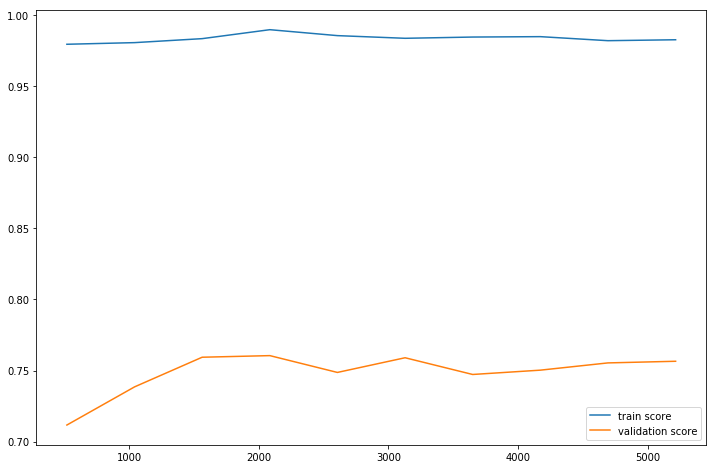

In [46]:
evaluation(model_1)